## IMPORTING LIBARIRES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D,GlobalAveragePooling2D,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## DATA LOADING:

In [2]:
data_dir = r"data\train"
leaf=[]
for file in os.listdir(data_dir):
    leaf+=[file]
print(leaf)
print(len(leaf))

['fake', 'real']
2


In [3]:
img_height,img_width=256,256
batch_size=20

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 348 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


## APPLYING CNN:

In [4]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height,img_width,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [5]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
hist=model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
18/18 [==============================] - 235s 13s/step - loss: 1.5910 - accuracy: 0.6149 - val_loss: 0.7816 - val_accuracy: 0.5135
Epoch 2/10
18/18 [==============================] - 236s 13s/step - loss: 0.5455 - accuracy: 0.7069 - val_loss: 0.6627 - val_accuracy: 0.5743
Epoch 3/10
18/18 [==============================] - 216s 12s/step - loss: 0.4765 - accuracy: 0.7241 - val_loss: 0.7025 - val_accuracy: 0.4797
Epoch 4/10
18/18 [==============================] - 144s 8s/step - loss: 0.4521 - accuracy: 0.8621 - val_loss: 1.0094 - val_accuracy: 0.5405
Epoch 5/10
18/18 [==============================] - 93s 5s/step - loss: 0.4388 - accuracy: 0.7701 - val_loss: 0.7458 - val_accuracy: 0.7095
Epoch 6/10
18/18 [==============================] - 79s 4s/step - loss: 0.2384 - accuracy: 0.8937 - val_loss: 0.8188 - val_accuracy: 0.6419
Epoch 7/10
18/18 [==============================] - 78s 4s/step - loss: 0.2991 - accuracy: 0.8793 - val_loss: 0.6765 - val_accuracy: 0.6959
Epoch 8/10
18

In [6]:
model.save("alg/cnn.h5")

## GRAPH:

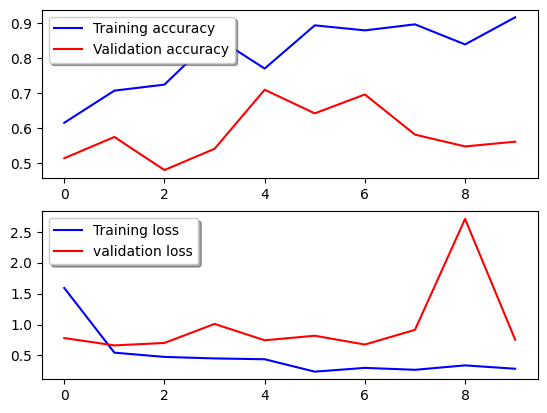

In [7]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss")
legend = ax[1].legend(loc='best', shadow=True)